<a href="https://colab.research.google.com/github/laugustovieira/prophet_covid/blob/main/Desafio_modulo03_aula01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import numpy as np

In [5]:
url = '/content/drive/MyDrive/Dados_BootCamp/dados_covid_sp.csv'  
dados = pd.read_csv(url, sep=";")

In [7]:
dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

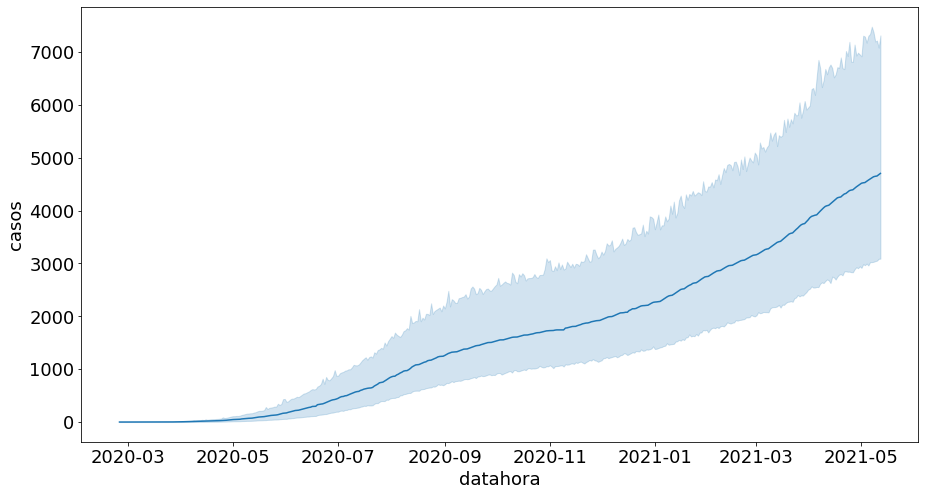

In [11]:
mpl.rcParams["font.size"] = 18
mpl.rcParams["figure.figsize"]= (15,8)
sns.lineplot(x="datahora",y="casos", data = dados)

# Escolhe outro município e realizar as consultas

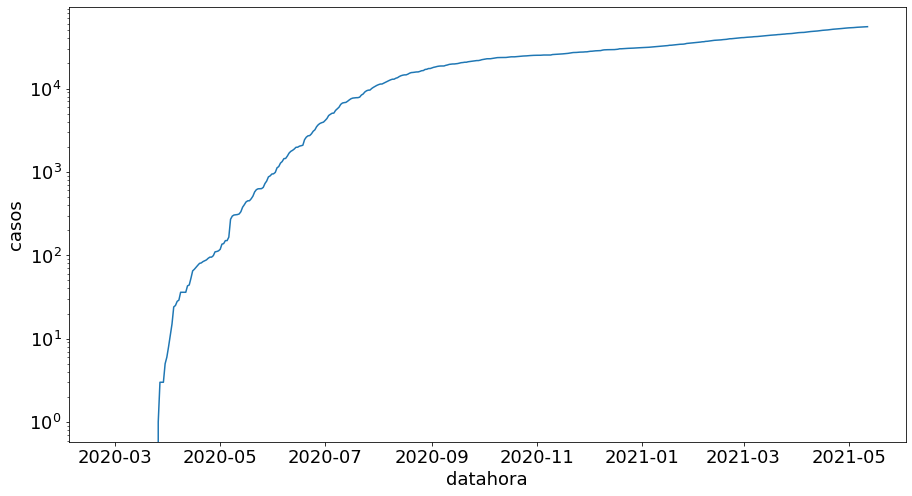

In [26]:
dados_rp = dados.query("nome_munic == 'Ribeirão Preto'")

sns.lineplot(x="datahora",y="casos", data = dados_rp)
mpl.pyplot.yscale("log")

#Desafio - Filtrar a base com outra função

In [47]:
dados_rp2 = dados[dados['nome_munic']=="Ribeirão Preto"]

In [46]:
dados_rp2.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
487,Ribeirão Preto,3543402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
1132,Ribeirão Preto,3543402,26,2,2020-02-26,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
1777,Ribeirão Preto,3543402,27,2,2020-02-27,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
2422,Ribeirão Preto,3543402,28,2,2020-02-28,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9
3067,Ribeirão Preto,3543402,29,2,2020-02-29,0,0,"0,000000e+00","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RA de Ribeirão Preto,11,Ribeirão Preto,1,683777,110330,65092,0,8.0,"-21,1699","-47,8099",9


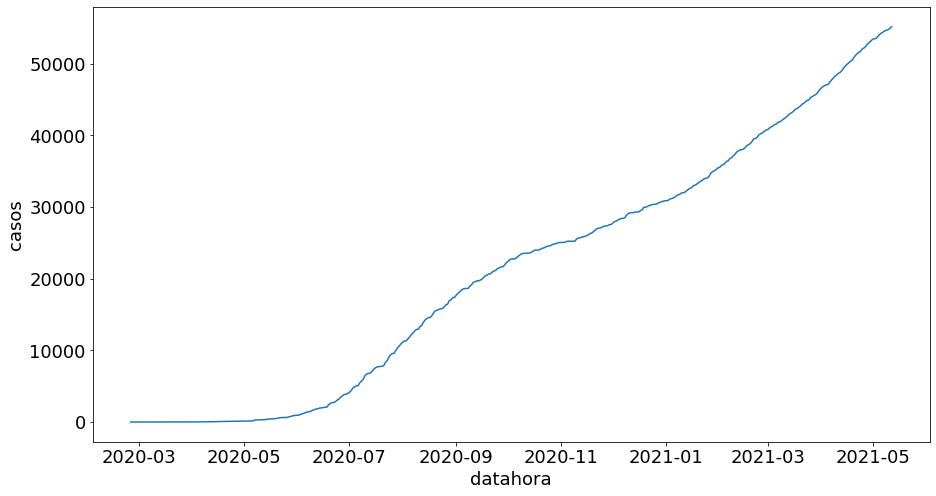

In [48]:
sns.lineplot(x="datahora",y="casos", data = dados_rp2)